## Applying data transformations using albumentations library

In [1]:
import PIL
import pathlib
import cv2 
import albumentations as A
import matplotlib.pyplot as plt
import os
import numpy as np
import PIL.Image as img 

Tried using augmentor library but started showing errors

In [2]:
# p_left = Augmentor.Pipeline(source_directory="/mnt/d/RE_img_class/training-20231025T182949Z-001/training/left/")
# p_left.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
# p_left.black_and_white(probability=0.3,threshold=20)
# p_left.zoom(probability=0.5, min_factor=0.7, max_factor=1.3)
# p_left.crop_random(probability=0.7, percentage_area=0.9)
# p_left.flip_left_right(probability=0.8)
# p_left.flip_top_bottom(probability=0.6)
# p_left.random_brightness(probability=0.6, min_factor=0.7, max_factor=1.3)
# p_left.random_contrast(probability=0.6, min_factor=0.7, max_factor=1.3)
# p_left.rotate90(probability=0.6)
# p_left.rotate270(probability=0.6)
# p_left.resize(probability=1.0, width=240, height=320)
# p_left.sample(500)

In [3]:
# p_right = Augmentor.Pipeline(source_directory="/mnt/d/RE_img_class/training-20231025T182949Z-001/training/right/")
# p_right.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
# p_right.black_and_white(probability=0.3,threshold=20)
# p_right.zoom(probability=0.5, min_factor=0.7, max_factor=1.3)
# p_right.crop_random(probability=0.7, percentage_area=0.9)
# p_right.flip_left_right(probability=0.8)
# p_right.flip_top_bottom(probability=0.6)
# p_right.random_brightness(probability=0.6, min_factor=0.7, max_factor=1.3)
# p_right.random_contrast(probability=0.6, min_factor=0.7, max_factor=1.3)
# p_right.rotate90(probability=0.6)
# p_right.rotate270(probability=0.6)
# p_right.resize(probability=1.0, width=240, height=320)
# p_right.sample(500)

To visualize

In [4]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

Applying transformation using albumentations
* Note: Using wsl2 for windows so path is different from windows

In [2]:
image = cv2.imread("/mnt/d/RE_img_class/training-20231025T182949Z-001/training/left/IMG218.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.Compose([
    
    A.RandomBrightnessContrast(),
    A.RandomCropFromBorders(),
    A.RandomRotate90(p=0.6),
    A.Rotate(limit=20),
    A.VerticalFlip(),
    A.HorizontalFlip(p=0.8),
    A.Blur(blur_limit=3),
    
    A.Resize(height=240, width=320, p=1),
])

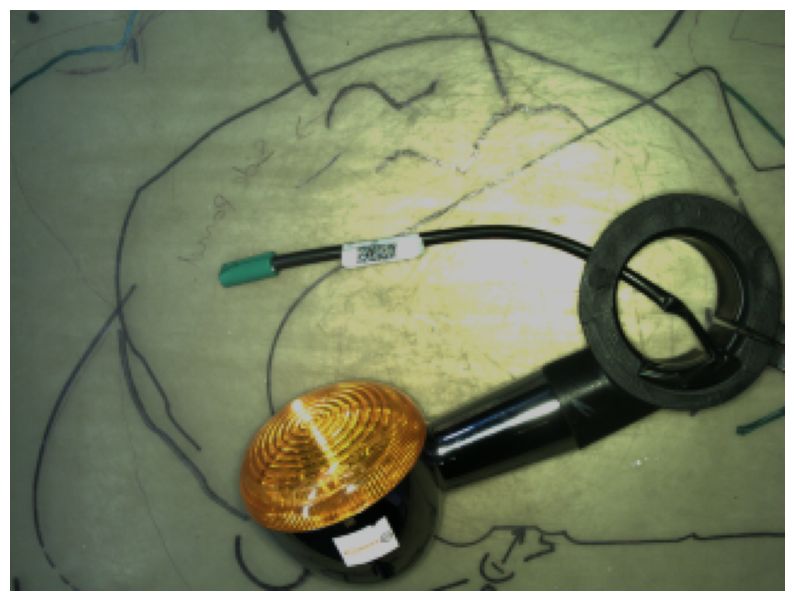

In [10]:
augmented_img = transform(image=image)['image']
visualize(augmented_img)

Generating images for all with left side light

In [6]:
data_dir_left = "/mnt/d/RE_img_class/training-20231025T182949Z-001/training/left"
data_dir_left = pathlib.Path(data_dir_left)
data_dir_left

PosixPath('/mnt/d/RE_img_class/training-20231025T182949Z-001/training/left')

In [7]:
left_images = list(data_dir_left.iterdir())
img_count_left = len(list(data_dir_left.iterdir()))
img_count_left

25

In [26]:
for i in left_images:
    image = cv2.imread(str(i))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for j in range(50):
        augmented_img = transform(image=image)['image']
        augmented_img = img.fromarray(augmented_img)
        augmented_img.save("/mnt/d/RE_img_class/training-20231025T182949Z-001/left_aug/" + str(left_images.index(i)) + str(j) + "_left.jpg")

Generating right side light images

In [3]:
data_dir_right = "/mnt/d/RE_img_class/training-20231025T182949Z-001/training/right/"
data_dir_right = pathlib.Path(data_dir_right)
data_dir_right

PosixPath('/mnt/d/RE_img_class/training-20231025T182949Z-001/training/right')

In [4]:
right_images = list(data_dir_right.iterdir())
img_count_right = len(list(data_dir_right.iterdir()))
img_count_right

26

In [5]:
for i in right_images:
    image = cv2.imread(str(i))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for j in range(50):
        augmented_img = transform(image=image)['image']
        augmented_img = img.fromarray(augmented_img)
        augmented_img.save("/mnt/d/RE_img_class/training-20231025T182949Z-001/right_aug/" + str(right_images.index(i)) + str(j) + "_right.jpg")

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Renaming all files

In [9]:
data_dir_left_aug = "/mnt/d/RE_img_class/training-20231025T182949Z-001/left_aug/"
data_dir_left_aug = pathlib.Path(data_dir_left_aug)

In [19]:
for count, filename in enumerate(os.listdir(data_dir_left_aug)):
        dst = f"left_aug_{str(count)}.jpg"
        src =f"{data_dir_left_aug}/{filename}"  
        dst =f"{data_dir_left_aug}/{dst}"
        os.rename(src, dst)

In [22]:
os.listdir(data_dir_left_aug)[:5]

['left_aug_0.jpg',
 'left_aug_1.jpg',
 'left_aug_10.jpg',
 'left_aug_100.jpg',
 'left_aug_1000.jpg']

In [21]:
data_dir_right_aug = "/mnt/d/RE_img_class/training-20231025T182949Z-001/right_aug/"
data_dir_right_aug

'/mnt/d/RE_img_class/training-20231025T182949Z-001/right_aug/'

In [23]:
for count, filename in enumerate(os.listdir(data_dir_right_aug)):
        dst = f"right_aug_{str(count)}.jpg"
        src =f"{data_dir_right_aug}/{filename}"  
        dst =f"{data_dir_right_aug}/{dst}"
        os.rename(src, dst)

In [25]:
os.listdir(data_dir_right_aug)[:5]

['right_aug_0.jpg',
 'right_aug_1.jpg',
 'right_aug_10.jpg',
 'right_aug_100.jpg',
 'right_aug_1000.jpg']